In [1]:
import csv

xs = []
ys = []
with open('../matlab/ex1data1.txt') as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        assert len(row) == 2
        xs.append(float(row[0]))
        ys.append(float(row[1]))
    m = len(ys)

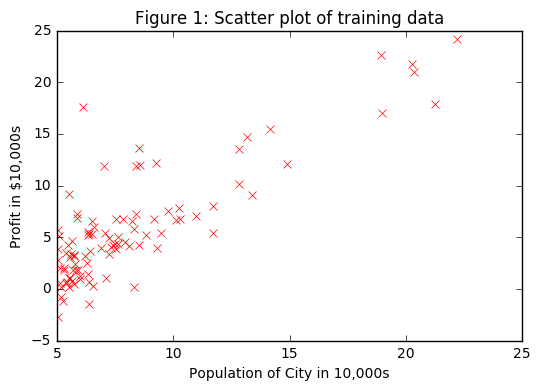

In [2]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.plot(xs, ys, 'rx')
plt.title('Figure 1: Scatter plot of training data')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

In [16]:
import numpy as np

X = np.array([np.ones(m), xs]).T
y = np.array([ys]).T
theta = np.zeros((2, 1))

iterations = 1500
alpha = 0.01

In [17]:
def compute_cost(X, y, theta):
    cost = 0
    ### YOUR CODE HERE ###

    cost = np.dot((np.dot(X,theta) -y).T,np.dot(X,theta) -y) / (2*len(X))
                
    ######################
    return cost 

compute_cost(X, y, theta)  # Should be 32.07

array([[ 32.07273388]])

In [18]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m, _ = y.shape
    J_history = []
    for _ in range(num_iters):
        ### YOUR CODE HERE ###
        
        theta = theta  - alpha * ((np.dot((np.dot(X,theta) -y).T , X)) / len(X)).T
        J_history += compute_cost(X, y, theta).tolist()
        ######################
    return theta, J_history

theta, J_history = gradient_descent(X, y, theta, alpha, iterations)

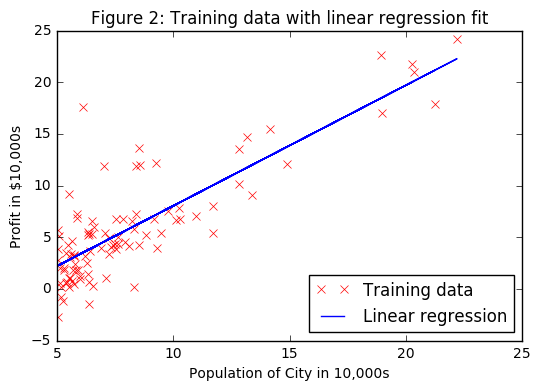

In [19]:
plt.plot(xs, ys, 'rx', label='Training data')
plt.plot(xs, np.dot(X, theta), 'b-', label='Linear regression')
plt.title('Figure 2: Training data with linear regression fit')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend(loc='lower right')

In [20]:
theta0_vals = np.arange(-10, 10, 0.1)
theta1_vals = np.arange(-1, 4, 0.1)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        t = np.array([[theta0], [theta1]])
        J_vals[i, j] = compute_cost(X, y, t)

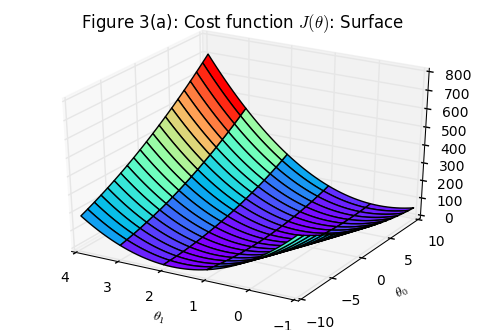

In [21]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(theta1_grid, theta0_grid, J_vals.T, cmap=cm.rainbow)
plt.title(r'Figure 3(a): Cost function $J(\theta)$: Surface')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_0$')
plt.gca().invert_xaxis()

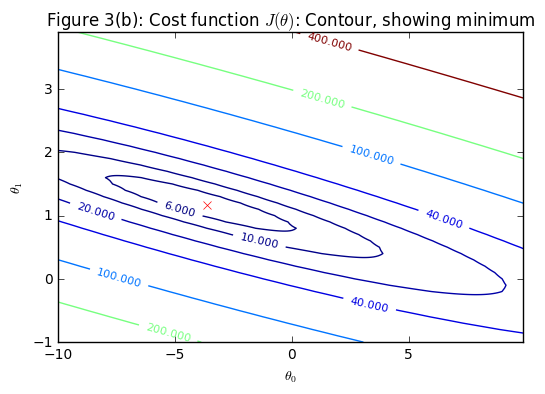

In [22]:
CS = plt.contour(theta0_grid, theta1_grid, J_vals.T, levels=[6, 10, 20, 40, 100, 200, 400])
plt.clabel(CS, inline=1, fontsize=8)
plt.plot(theta[0, 0], theta[1, 0], 'rx')
plt.title(r'Figure 3(b): Cost function $J(\theta)$: Contour, showing minimum')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

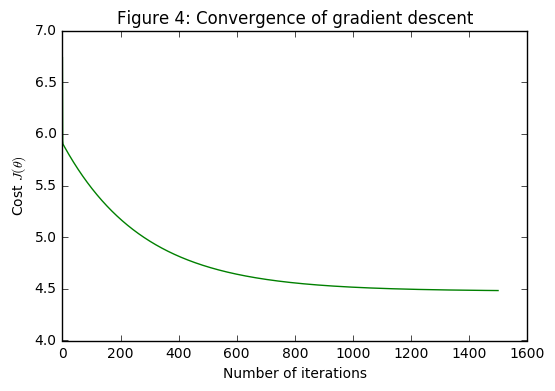

In [23]:
plt.plot(J_history, 'g-')
plt.title('Figure 4: Convergence of gradient descent')
plt.xlabel('Number of iterations')
plt.ylabel(r'Cost $J(\theta)$')